In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/FireSegmentation/FireSeg_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/FireSegmentation/FireSeg_masks.npy')

In [3]:
X_test = images[10000:12000]
y_test = masks[10000:12000]

In [4]:
images = images[0:10000]
masks = masks[0:10000]

In [5]:
images.shape

(10000, 512, 512, 1)

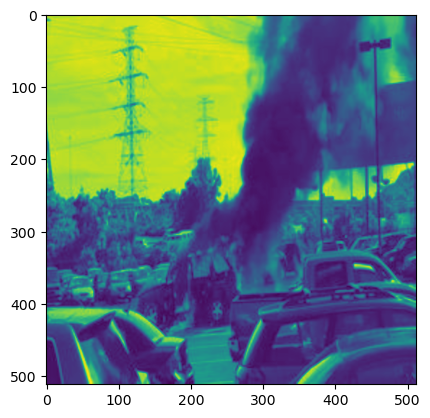

In [6]:
imshow(images[100])

In [7]:
masks.shape

(10000, 512, 512, 1)

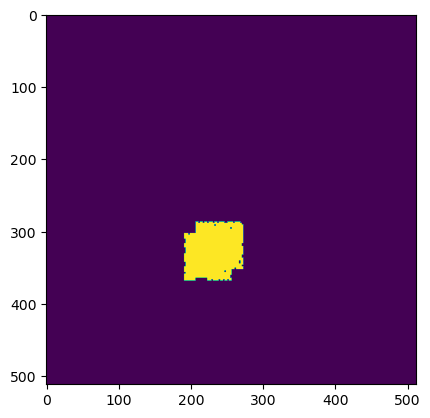

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpx71z76e4kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpru3bd_qdkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpru3bd_qdkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=3, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_2_3_fireseg.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
32/32 [==============================] - 33s 719ms/step - loss: 0.0392 - dice_coeff: 0.6850 - val_loss: 0.0334 - val_dice_coeff: 0.7316
Epoch 2/100
32/32 [==============================] - 15s 481ms/step - loss: 0.0312 - dice_coeff: 0.7401 - val_loss: 0.0353 - val_dice_coeff: 0.7338
Epoch 3/100
32/32 [==============================] - 15s 483ms/step - loss: 0.0277 - dice_coeff: 0.7723 - val_loss: 0.0336 - val_dice_coeff: 0.7353
Epoch 4/100
32/32 [==============================] - 15s 485ms/step - loss: 0.0258 - dice_coeff: 0.7866 - val_loss: 0.0423 - val_dice_coeff: 0.7356
Epoch 5/100
32/32 [==============================] - 15s 483ms/step - loss: 0.0246 - dice_coeff: 0.7995 - val_loss: 0.0390 - val_dice_coeff: 0.7370
Epoch 6/100
32/32 [==============================] - 15s 483ms/step - loss: 0.0220 - dice_coeff: 0.8182 - val_loss: 0.0375 - val_dice_coeff: 0.7523
Epoch 7/100
32/32 [==============================] - 15s 483ms/step 

In [16]:
R.classifier_scores

[[0.04842747002840042, 0.7517246603965759],
 [0.060460589826107025, 0.7541810870170593],
 [0.05763731896877289, 0.7438623905181885]]

In [17]:
R.discriminator_scores

[[0.009373663924634457, 0.9933333396911621],
 [0.025695260614156723, 0.9883333444595337],
 [0.00378249678760767, 0.9983333349227905]]

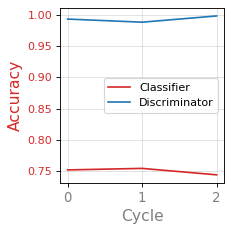

In [18]:
R.plot()

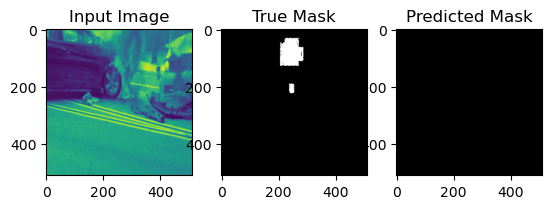

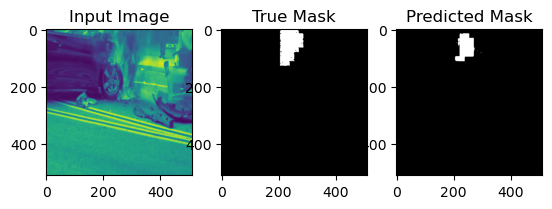

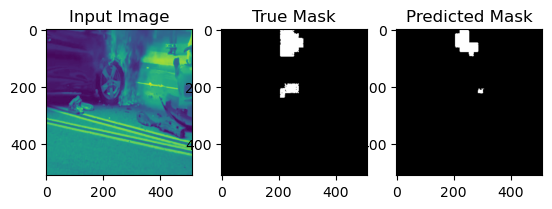

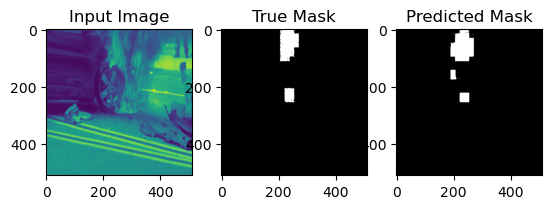

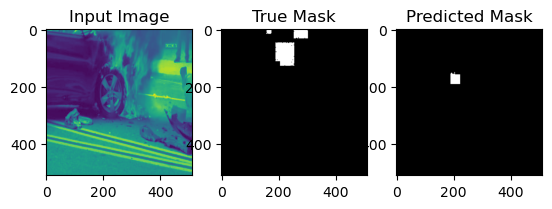

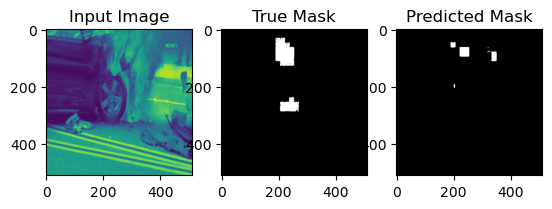

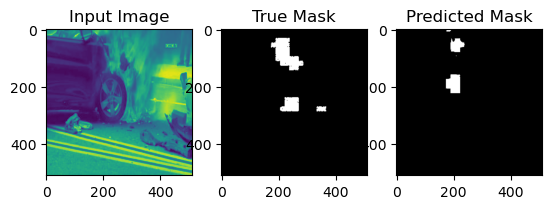

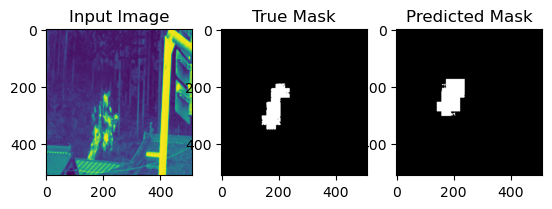

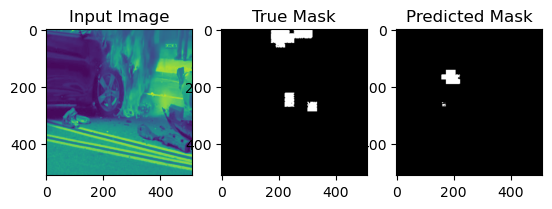

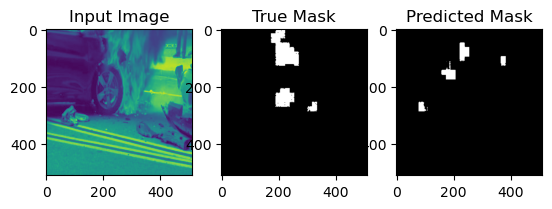

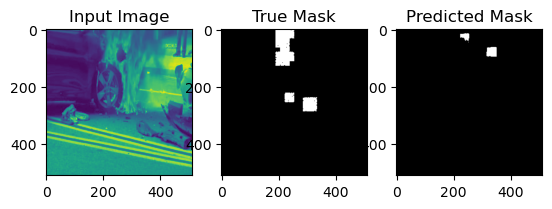

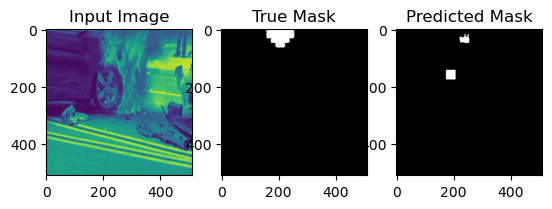

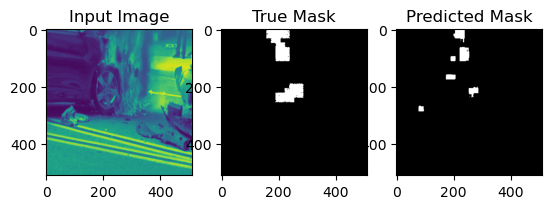

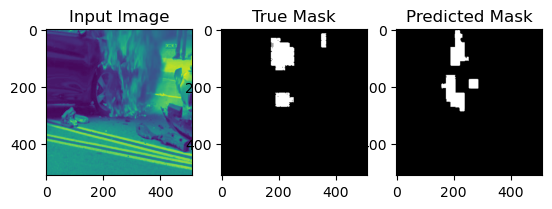

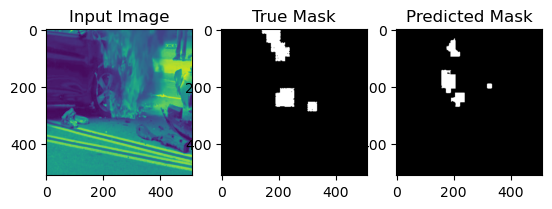

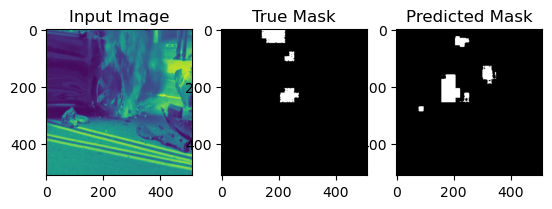

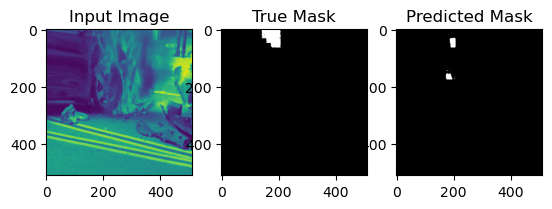

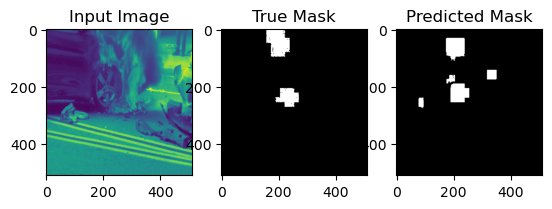

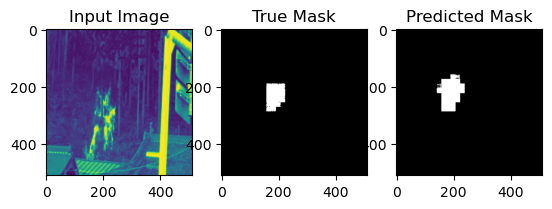

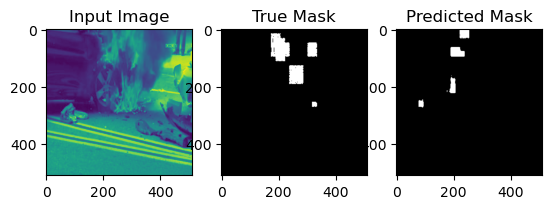

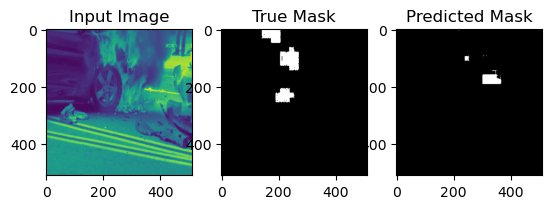

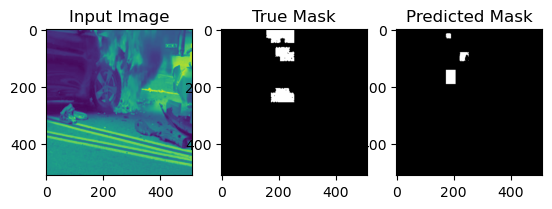

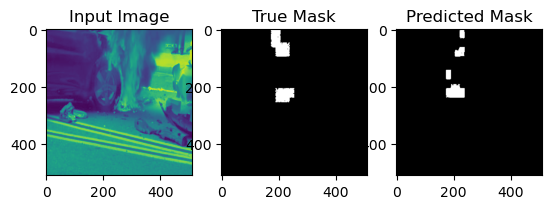

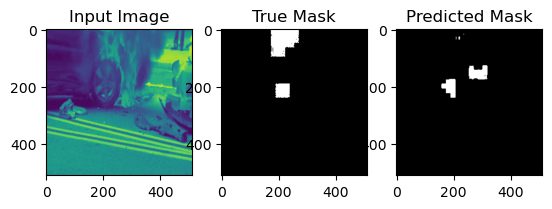

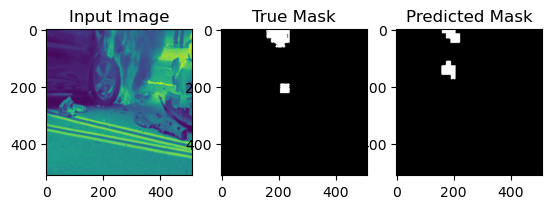

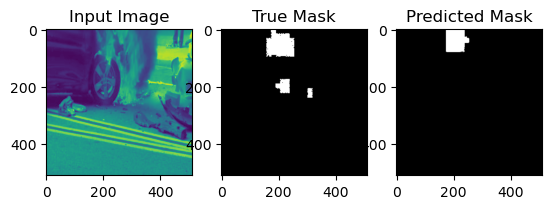

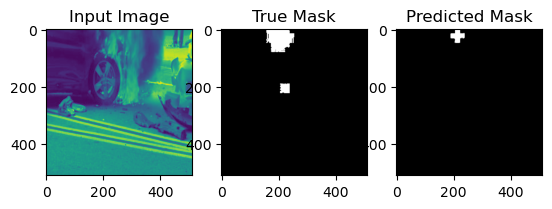

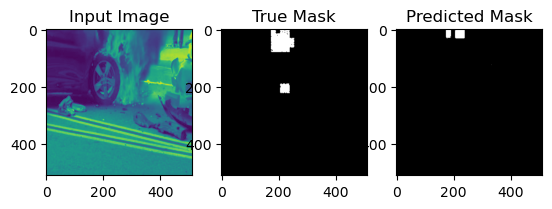

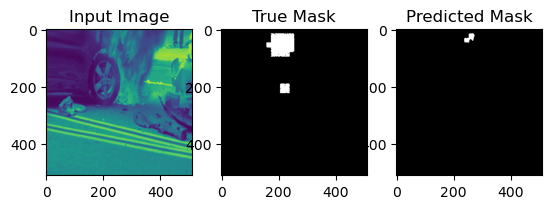

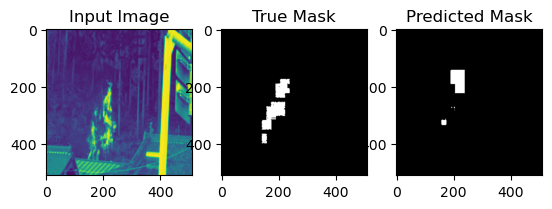

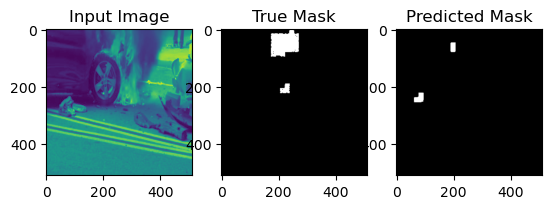

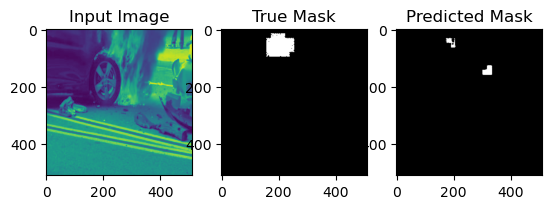

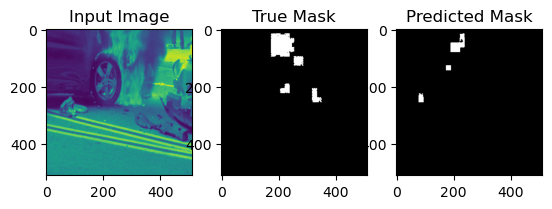

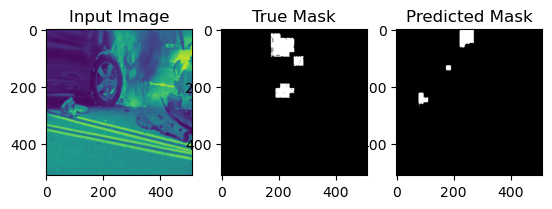

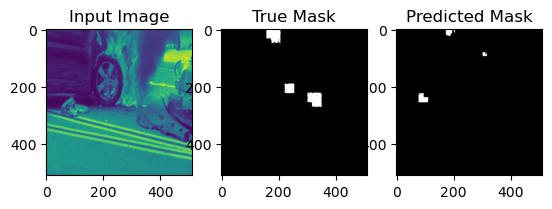

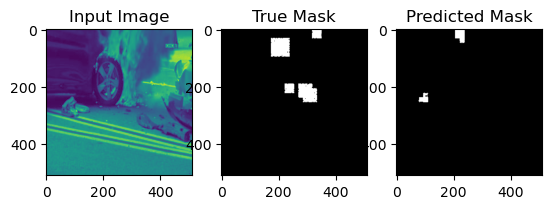

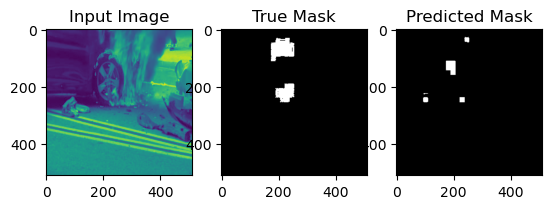

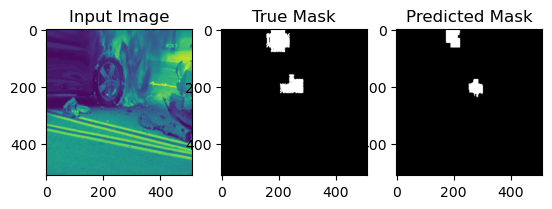

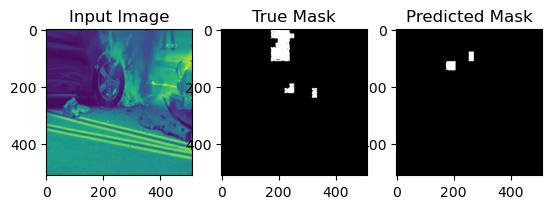

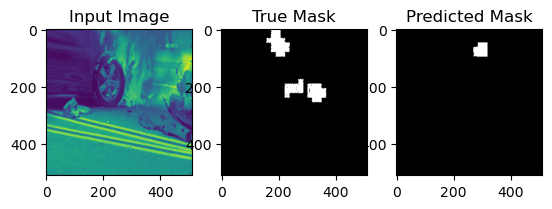

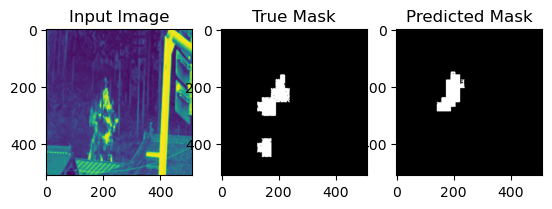

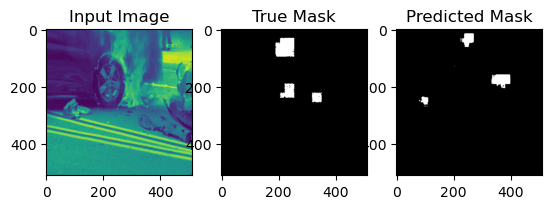

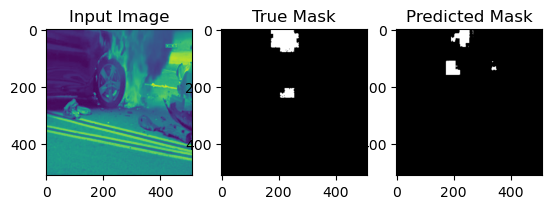

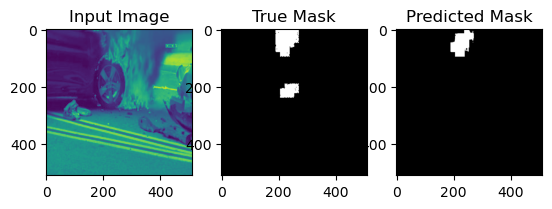

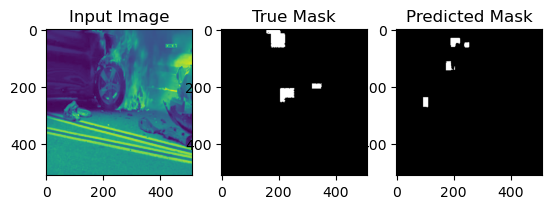

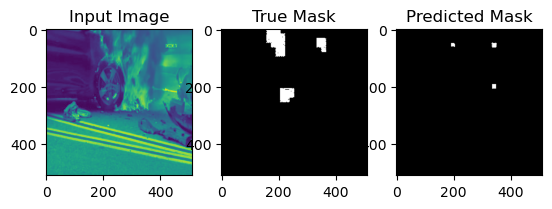

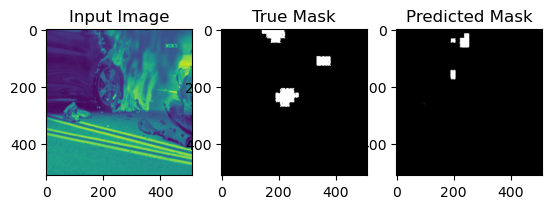

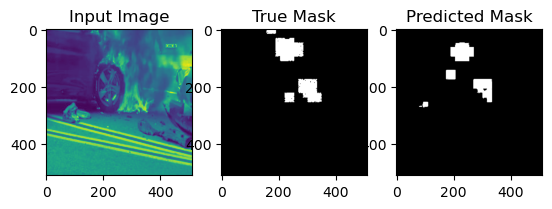

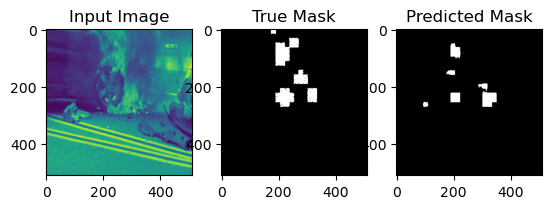

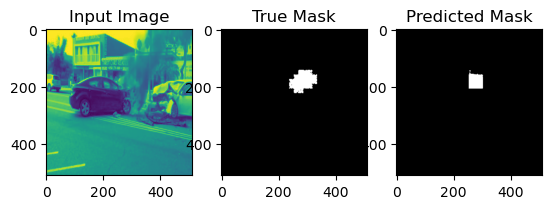

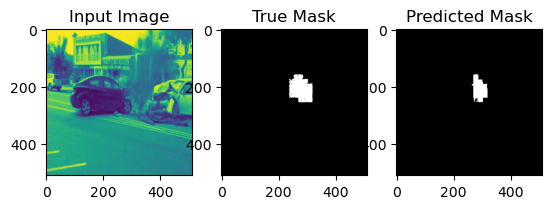

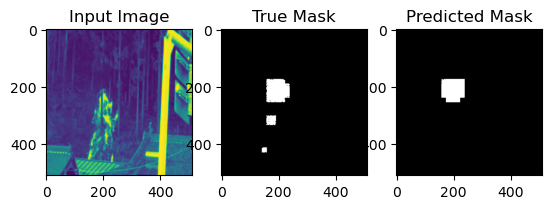

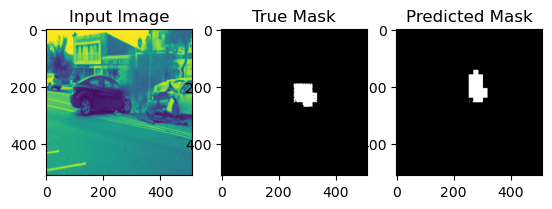

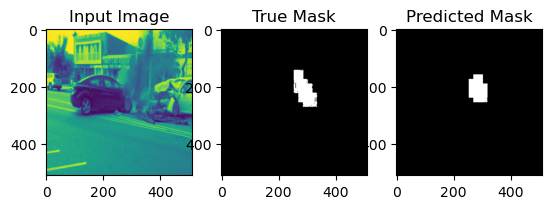

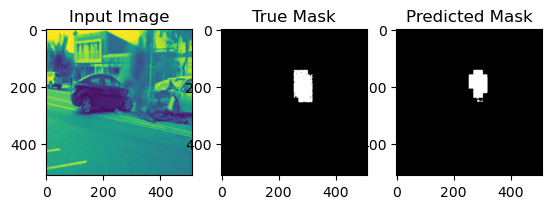

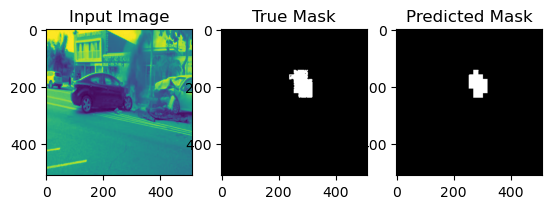

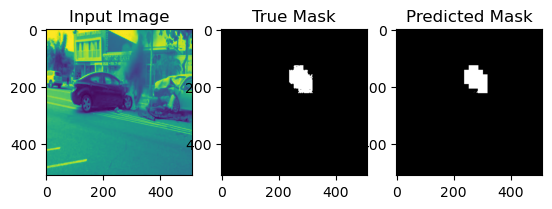

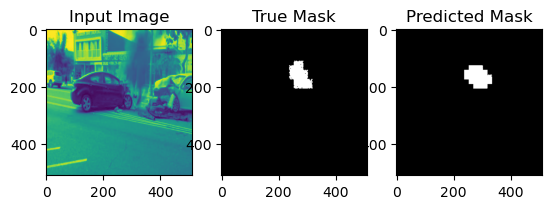

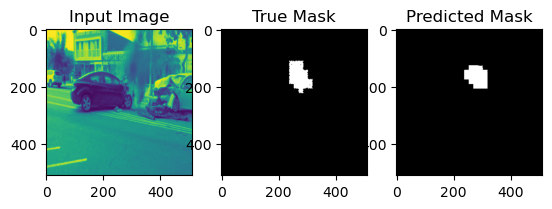

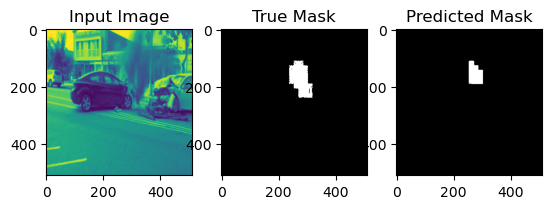

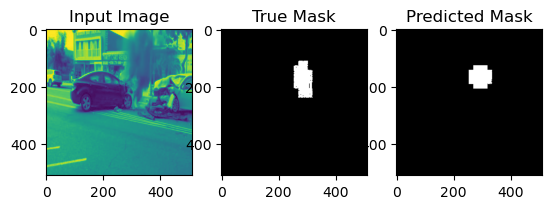

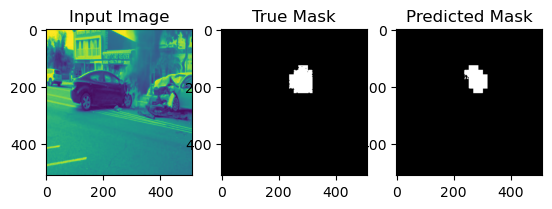

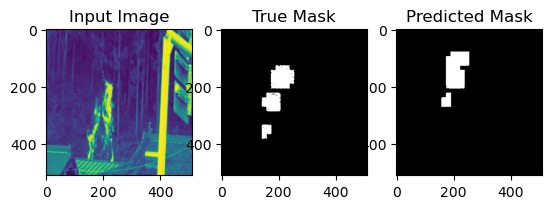

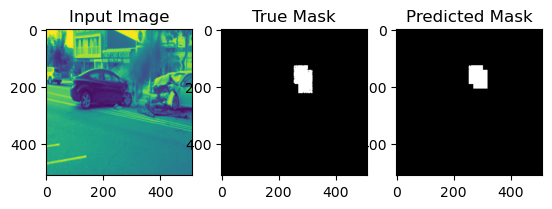

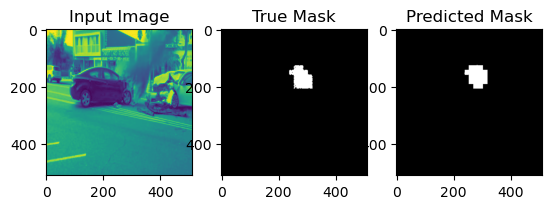

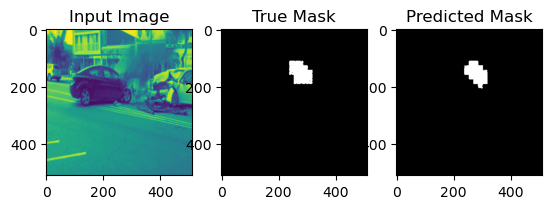

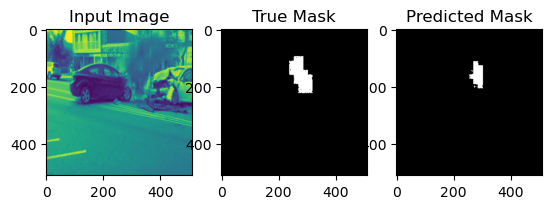

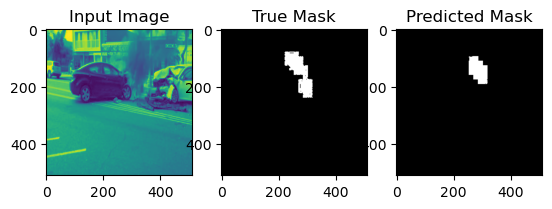

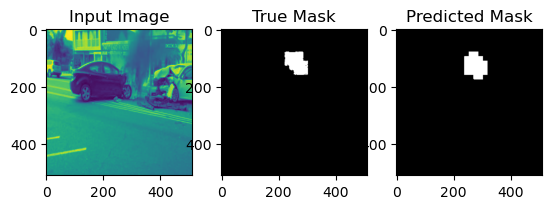

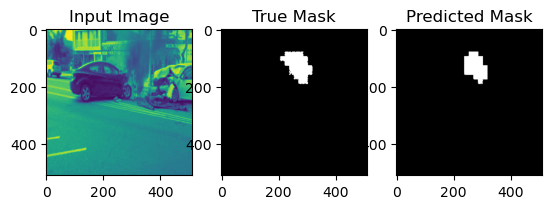

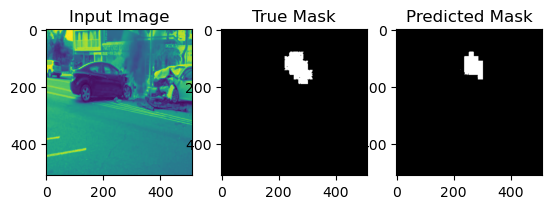

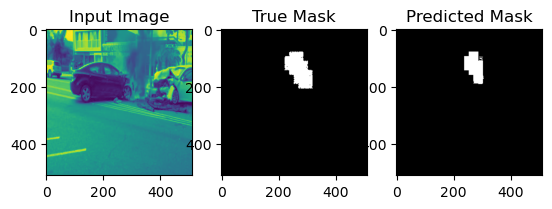

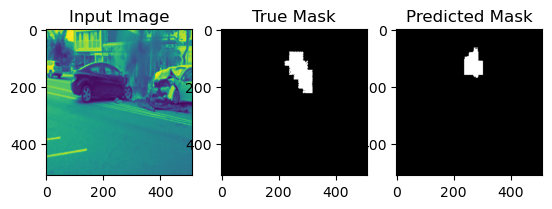

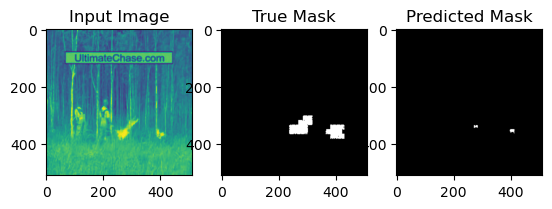

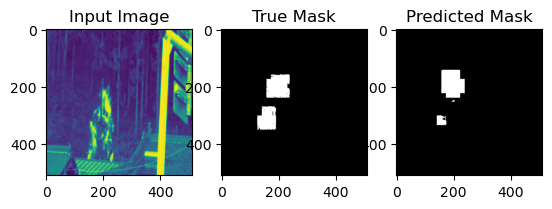

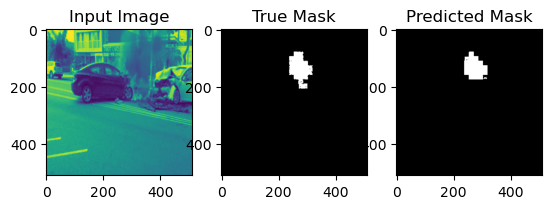

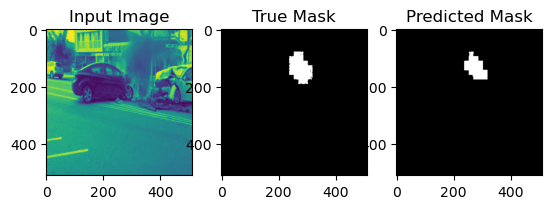

In [ ]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [ ]:
y_pred = R.classifier.predict(X_test, y_test)

In [ ]:
y_pred

In [ ]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpx71z76e4kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

In [ ]:
barebone_pred = BareBone.predict(X_test, y_test)

In [ ]:
barebone_pred

In [ ]:
BareBone.model.metrics_names